<a href="https://colab.research.google.com/github/PaulPawelec/DataMining/blob/main/Netflix_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

In [9]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')

In [10]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [11]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [13]:
df.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [14]:
column_to_remove = ['index', 'id', 'imdb_id']
df.drop(column_to_remove, inplace = True, axis = 1)
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [15]:
df.description = df.description.fillna("No description")

In [16]:
df.isna().sum()

title                   0
type                    0
description             0
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [17]:
df.age_certification.unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [18]:
df.age_certification = df.age_certification.fillna("Unknown")

In [19]:
df.isna().sum()

title                 0
type                  0
description           0
release_year          0
age_certification     0
runtime               0
imdb_score            0
imdb_votes           16
dtype: int64

In [20]:
med = df.imdb_votes.median()
df.imdb_votes = df.imdb_votes.fillna(med)

In [21]:
df.isna().sum()

title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_score           0
imdb_votes           0
dtype: int64

### Visualization

Counting TV Shows and movies.

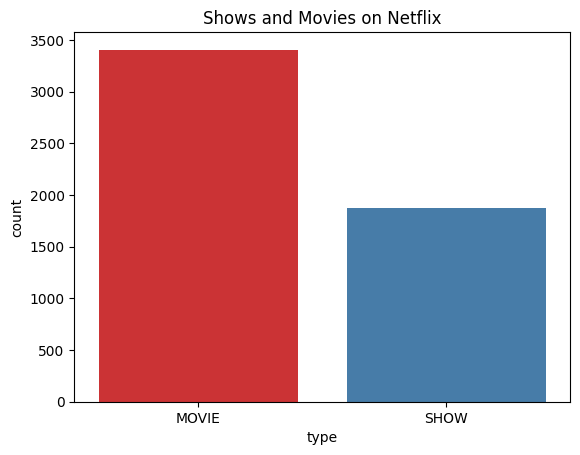

In [50]:
sns.countplot(data=df, x='type', palette='Set1')
plt.title('Shows and Movies on Netflix')
plt.show()

Max runtime

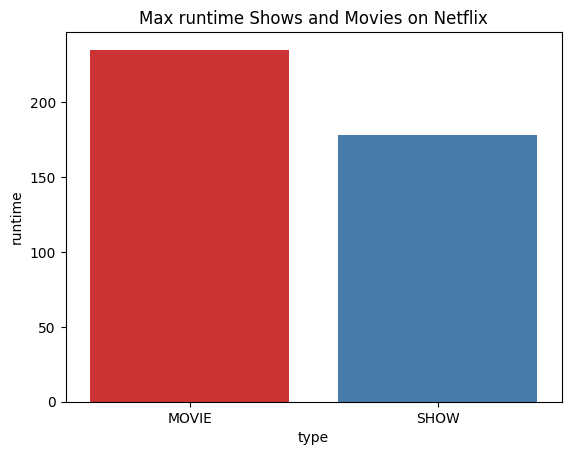

In [75]:
sns.barplot(data=df, x='type', y='runtime', estimator = np.max, errorbar=('ci', 0), palette='Set1')
plt.title('Max runtime Shows and Movies on Netflix')
plt.show()

Sum runtime

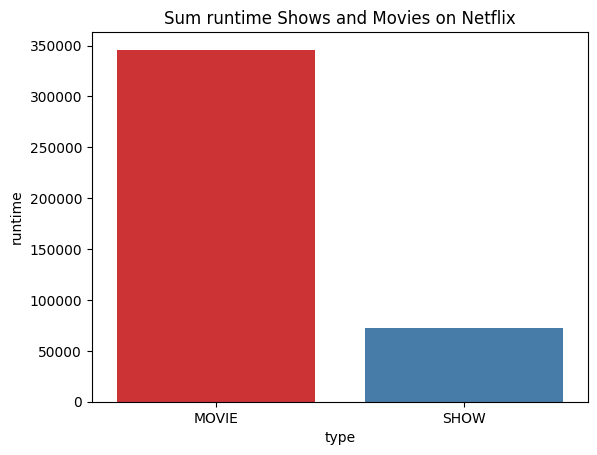

In [76]:
sns.barplot(data=df, x='type', y='runtime', estimator = np.sum, errorbar=('ci', 0), palette='Set1')
plt.title('Sum runtime Shows and Movies on Netflix')
plt.show()

Average rating and number of votes

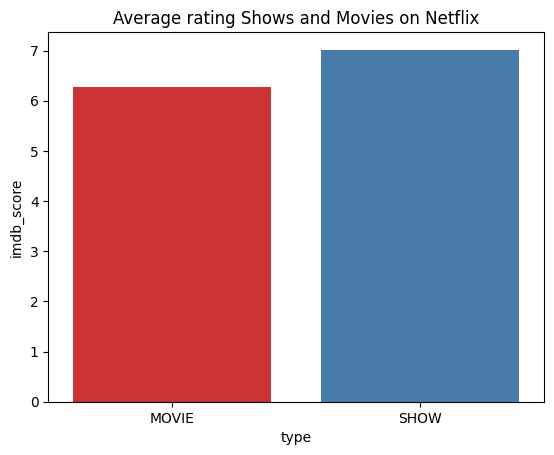

In [74]:
sns.barplot(data=df, x='type', y='imdb_score', estimator = np.mean, errorbar=('ci', 0), palette='Set1')
plt.title('Average rating Shows and Movies on Netflix')
plt.show()

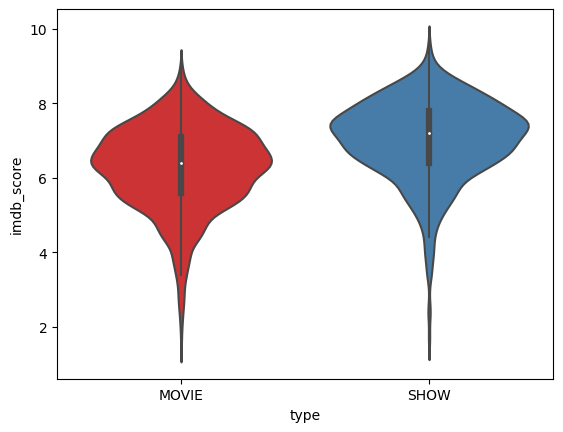

In [73]:
sns.violinplot(data=df, x='type', y='imdb_score', palette='Set1')
plt.show()

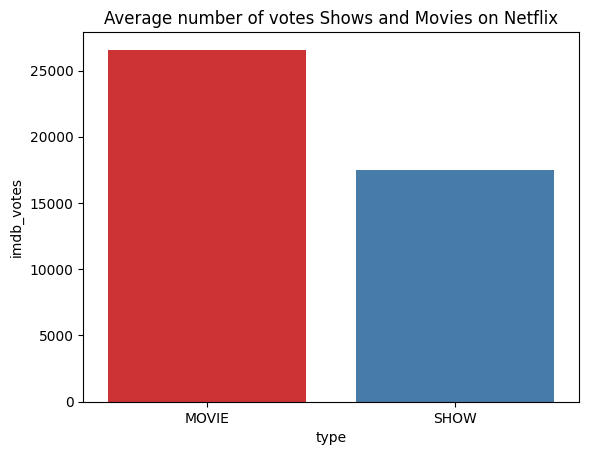

In [72]:
sns.barplot(data=df, x='type', y='imdb_votes', estimator = np.mean, errorbar=('ci', 0), palette='Set1')
plt.title('Average number of votes Shows and Movies on Netflix')
plt.show()

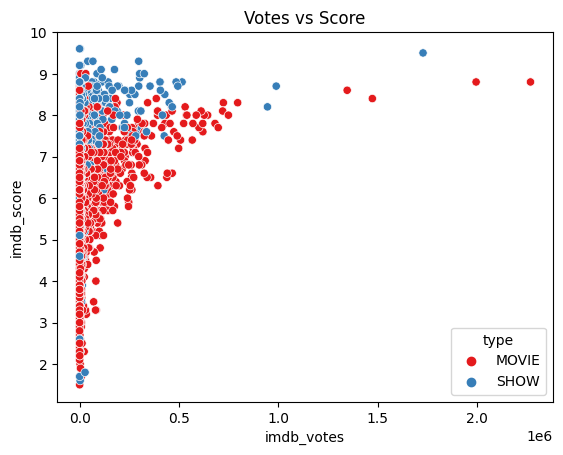

In [71]:
sns.scatterplot(data=df, x='imdb_votes', y='imdb_score', hue='type', palette='Set1')
plt.title('Votes vs Score')
plt.show()

Productions per year

In [113]:
yearly_productions = df['release_year'].value_counts().sort_index()
yearly_productions.index

Int64Index([1953, 1954, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1966,
            1967, 1968, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

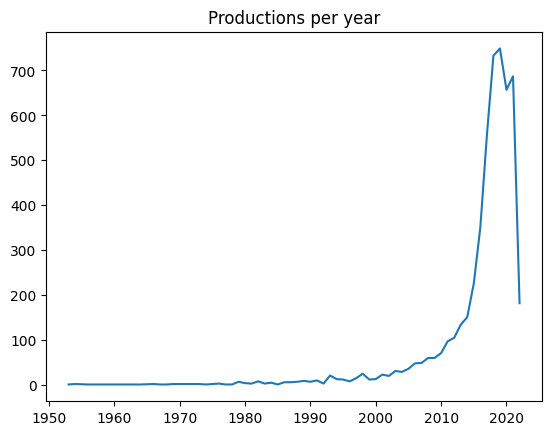

In [120]:
sns.lineplot(data=yearly_productions, x=yearly_productions.index, y=yearly_productions.values)
plt.title('Productions per year')
plt.show()

Avarage rating per production year

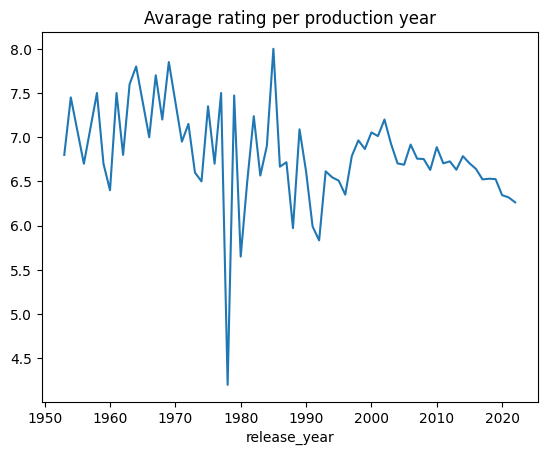

In [124]:
yearly_ava_rate = df.groupby('release_year')['imdb_score'].mean()

sns.lineplot(data=yearly_ava_rate, x=yearly_ava_rate.index, y=yearly_ava_rate.values)
plt.title('Avarage rating per production year')
plt.show()

Avarage votes per production year

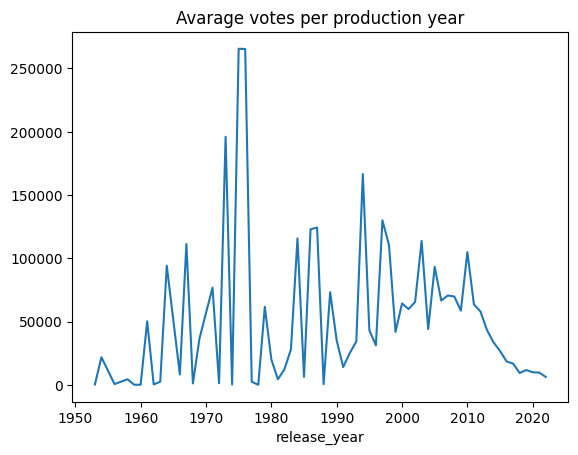

In [125]:
yearly_ava_votes = df.groupby('release_year')['imdb_votes'].mean()

sns.lineplot(data=yearly_ava_votes, x=yearly_ava_votes.index, y=yearly_ava_votes.values)
plt.title('Avarage votes per production year')
plt.show()

TOP 10 for all productions

In [93]:
top10 = df[df['imdb_votes'] > 1000].nlargest(10, 'imdb_score')
top10

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
622,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,9.6,3046.0
229,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,9.5,1727694.0
245,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,9.3,297336.0
3144,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,9.3,41386.0
3597,Kota Factory,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,42,9.3,66985.0
1346,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,9.2,6557.0
1953,My Mister,SHOW,"In a world that is less than kind, a young wom...",2018,TV-14,79,9.2,5481.0
3026,The Last Dance,SHOW,A 10-part documentary chronicling the untold s...,2020,TV-MA,50,9.1,108321.0
4429,Arcane,SHOW,Amid the stark discord of twin cities Piltover...,2021,TV-14,41,9.1,175412.0
194,Okupas,SHOW,"During the year 2000, Ricardo, Pollo, Walter a...",2000,TV-MA,40,9.0,2326.0


TOP 10 for all Movies

In [104]:
top10 = df[(df['imdb_votes'] > 1000) & (df['type'] == "MOVIE")].nlargest(10, 'imdb_score')
top10

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
2685,C/o Kancharapalem,MOVIE,From a schoolboyâ€™s crush to a middle-aged ba...,2018,PG,152,9.0,6562.0
3172,David Attenborough: A Life on Our Planet,MOVIE,The story of life on our planet by the man who...,2020,PG,83,9.0,31180.0
101,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,8.8,1994599.0
246,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,8.8,2268288.0
4143,Sky Tour: The Movie,MOVIE,"From the preparations to the performances, thi...",2020,Unknown,94,8.8,1036.0
566,Anbe Sivam,MOVIE,Nalla Sivam and Anbarasu meet under different ...,2003,Unknown,160,8.7,20595.0
4522,Bo Burnham: Inside,MOVIE,"Stuck in COVID-19 lockdown, US comedian and mu...",2021,R,87,8.7,44074.0
104,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,8.6,1346020.0
2909,Merku Thodarchi Malai,MOVIE,Living on the borders of Kerala and Tamil Nadu...,2018,Unknown,122,8.6,1810.0
3577,"Best Wishes, Warmest Regards: A Schitt's Creek...",MOVIE,"Interviews with the cast, creators, journalist...",2020,Unknown,44,8.6,1357.0
